[[ -1.77880485 -12.54863053  30.74080843   2.27982822   4.35321717
    0.53518118]
 [ -1.89305437 -12.12477848  30.77642916   2.78140272   4.16421593
    0.50310436]
 [-14.96041135  -1.06203685  34.82671463  13.86717503  -6.07634667
   -1.25242293]]


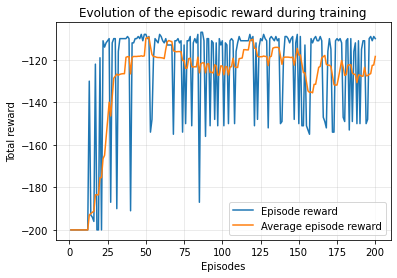

<Figure size 432x288 with 0 Axes>

In [20]:
from problem2 import *

# QUESTION C

# Parameter
eta = np.array([[0,1],[1,0],[1,1],[1,2],[2,1],[2,2]])
nb_basis = eta.shape[0]
N_episodes = 200       # Number of episodes to run for training
discount_factor = 0.99    # Value of gamma
lambda_value = 0.89       # Value of lambda
alpha = 0.01             # learning_rate
agent_type = 'optimal'

W,episode_reward_list = Sarsa_lambda(env, N_episodes, discount_factor, alpha, lambda_value, nb_basis, eta, agent_type)
#pickle.dump( { "W": W, "N": eta }, open( "weights/weights_vic.pkl", "wb" ) )

print(W)


# Plot Rewards

plt.plot([i for i in range(1, N_episodes+1)], episode_reward_list, label='Episode reward')
plt.plot([i for i in range(1, N_episodes+1)], running_average(episode_reward_list, 10), label='Average episode reward')
plt.xlabel('Episodes')
plt.ylabel('Total reward')
plt.title('Evolution of the episodic reward during training')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
plt.savefig("figures/Question_C.png")

In [21]:
#pickle.dump( { "W": W, "N": eta }, open( "weights/weights.pkl", "wb" ) )

Checking solution...


Episode 199: 100%|██████████| 200/200 [00:01<00:00, 116.96it/s]


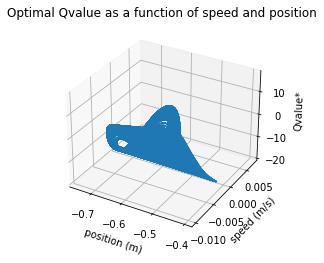

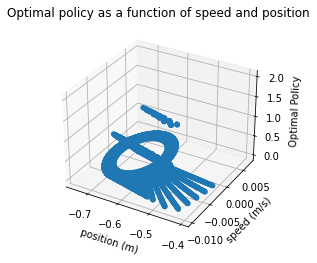

In [2]:
f = open('weights/weights.pkl', 'rb')
data = pickle.load(f)
w = data['W']
eta = data['N']
N_EPISODES = 200

optimal_Qvalue,optimal_policy,position,speed = Plotter(N_EPISODES,eta,w)

# QUESTION D) 2)
fig1 = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot3D(position, speed, optimal_Qvalue)
ax.set_title('Optimal Qvalue as a function of speed and position')
ax.set_xlabel('position (m)')
ax.set_ylabel('speed (m/s)')
ax.set_zlabel('Qvalue*')
plt.show()

# QUESTION D) 3)
fig2 = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(position, speed, optimal_policy)
ax.set_title('Optimal policy as a function of speed and position')
ax.set_xlabel('position (m)')
ax.set_ylabel('speed (m/s)')
ax.set_zlabel('Optimal Policy')
plt.show()

[[-47.14015573  -6.50583837  -3.52792311  36.81578496   1.90103699
   25.54092403   4.1873174 ]
 [-37.15774509  -2.64085888 -16.42529533  33.65466445  18.75867912
   27.37201586 -19.84340113]
 [-39.20856219  -2.60586452 -15.21549744  34.2409124   17.9909021
   26.19429943 -19.64428222]]


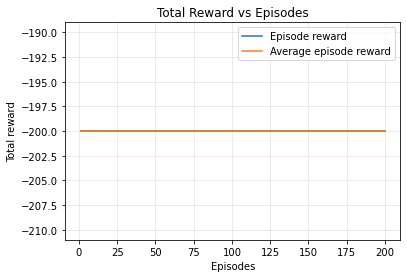

<Figure size 432x288 with 0 Axes>

In [23]:
# QUESTION D4

from problem2 import *

# Parameter
eta = np.array([[0,0],[0,1],[1,0],[1,1],[1,2],[2,1],[2,2]])
nb_basis = len(eta)
N_episodes = 200       # Number of episodes to run for training
discount_factor = 0.99    # Value of gamma
lambda_value = 0.89       # Value of lambda
alpha = 0.01             # learning_rate
agent_type = 'optimal'

W,episode_reward_list = Sarsa_lambda(env, N_episodes, discount_factor, alpha, lambda_value, nb_basis, eta, agent_type)
#pickle.dump( { "W": W, "N": eta }, open( "weights/weights_vic_with_zero.pkl", "wb" ) )

print(W)


# Plot Rewards

plt.plot([i for i in range(1, N_episodes+1)], episode_reward_list, label='Episode reward')
plt.plot([i for i in range(1, N_episodes+1)], running_average(episode_reward_list, 10), label='Average episode reward')
plt.xlabel('Episodes')
plt.ylabel('Total reward')
plt.title('Total Reward vs Episodes')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
plt.savefig("figures/Question_D4.png")




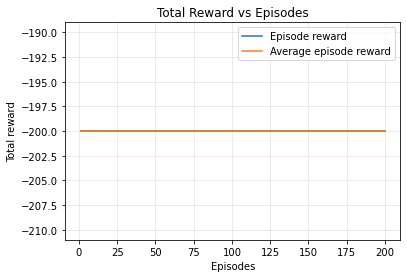

In [32]:
# QUESTION D5 - Trying with a random agent

from problem2 import *

# Parameter
eta = np.array([[0,1],[1,0],[1,1],[1,2],[2,1],[2,2]])
nb_basis = len(eta)
N_episodes = 200       # Number of episodes to run for training
discount_factor = 0.99    # Value of gamma
lambda_value = 0.89       # Value of lambda
alpha = 0.01             # learning_rate
agent_type = 'random' 

W,episode_reward_list = Sarsa_lambda(env, N_episodes, discount_factor, alpha, lambda_value, nb_basis, eta, agent_type)

#pickle.dump( { "W": W, "N": eta }, open( "weights/weights_with_random.pkl", "wb" ) )

# Plot Rewards

plt.plot([i for i in range(1, N_episodes+1)], episode_reward_list, label='Episode reward')
plt.plot([i for i in range(1, N_episodes+1)], running_average(episode_reward_list, 10), label='Average episode reward')
plt.xlabel('Episodes')
plt.ylabel('Total reward')
plt.title('Total Reward vs Episodes')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


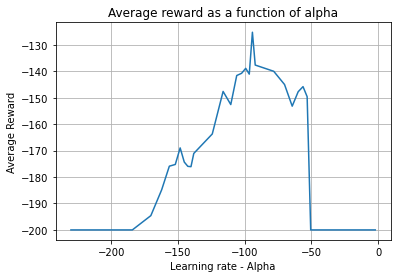

In [17]:
# QUESTION E - Average reward as a function of alpha

from problem2 import *
# Parameter
eta = np.array([[0,1],[1,0],[1,1],[1,2],[2,1],[2,2]])
nb_basis = eta.shape[0]
N_episodes = 100       # Number of episodes to run for training
discount_factor = 0.99    # Value of gamma
lambda_value = 0.89       # Value of lambda
agent_type = 'optimal'
avg_reward_list = []


alpha_list=[]
scale = np.linspace(1,9,9)
S = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
for elt in S:
    for elt2 in scale:
        alpha_list.append(elt*elt2)

for alpha in alpha_list:
    _,episode_reward_list = Sarsa_lambda(env, N_episodes, discount_factor, alpha, lambda_value, nb_basis, eta, agent_type)
    avg_reward_list.append(np.mean(episode_reward_list))

fig_alpha = plt.figure()
plt.plot(20*np.log(alpha_list),avg_reward_list)
#plt.scatter(alpha_list,avg_reward_list)
plt.title('Average reward as a function of alpha')
plt.xlabel('Learning rate - Alpha')
plt.ylabel('Average Reward')
plt.grid(True)
plt.show()

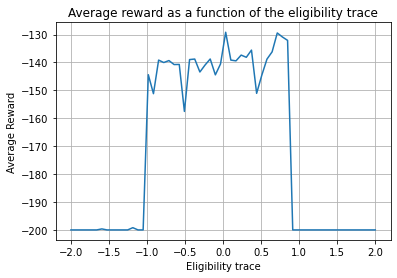

In [9]:
# QUESTION E - Average reward as a function of lambda (eligibility trace) 

from problem2 import *
# Parameter
eta = np.array([[0,1],[1,0],[1,1],[1,2],[2,1],[2,2]])
nb_basis = eta.shape[0]
N_episodes = 200       # Number of episodes to run for training
discount_factor = 0.99    # Value of gamma  
agent_type = 'optimal'
avg_reward_list = []
alpha = 0.01 # learning_rate

lambda_value_list = np.linspace(-2,2,60) # Value of lambda

for lambda_value in lambda_value_list:
    _,episode_reward_list = Sarsa_lambda(env, N_episodes, discount_factor, alpha, lambda_value, nb_basis, eta, agent_type)
    avg_reward_list.append(np.mean(episode_reward_list))

fig_alpha = plt.figure()
plt.plot(lambda_value_list,avg_reward_list)
plt.title('Average reward as a function of the eligibility trace')
plt.xlabel('Eligibility trace')
plt.ylabel('Average Reward')
plt.grid(True)
plt.show()